[10.02068966] [-1.47103448]


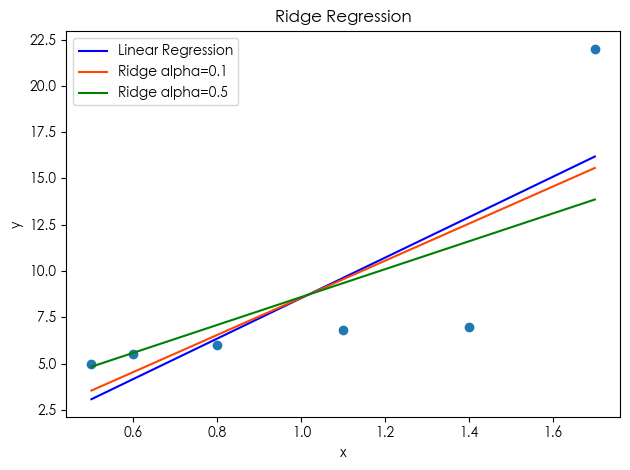

In [1]:
### 岭回归
## 当样本中存在异常值时,损失函数添加一个L2正则化项,减小模型过拟合
# Ridge 岭回归 就是L2正则化 权重平方和 * 系数
# Lasso 套索回归 就是L1正则化 权重绝对值和 * 系数

from sklearn.linear_model import Ridge, LinearRegression, Lasso
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4, 1.7]).reshape(-1, 1)
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0, 22]).reshape(-1, 1)

linear = LinearRegression()
linear.fit(xs, ys)
y_linear = linear.predict(xs)

## alpha正则强度
## alpha=0 退化成普通线性回归,偏差小, 但方差可能更大, 太小,过拟合
## alpha > 0, 增加偏差, 但降低方差, 总体误差可能更小, 太大,会导致欠拟合
alpha1 = 0.1
model = Ridge(alpha=alpha1, fit_intercept=True, max_iter=10000)
model.fit(xs, ys)
print(model.coef_, model.intercept_)
y_pred = model.predict(xs)

alpha2 = 0.5
model2 = Ridge(alpha=alpha2, fit_intercept=True, max_iter=10000)
model2.fit(xs, ys)
y_pred2 = model2.predict(xs)

plt.figure()
plt.scatter(xs, ys)
plt.plot(xs, y_linear, color='blue', label='Linear Regression')
plt.plot(xs, y_pred, color='orangered', label=f'Ridge alpha={alpha1}')
plt.plot(xs, y_pred2, color='green', label=f'Ridge alpha={alpha2}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ridge Regression')
plt.tight_layout()
plt.show()

-36.06346584917847 [5.743083] [2.87786561]


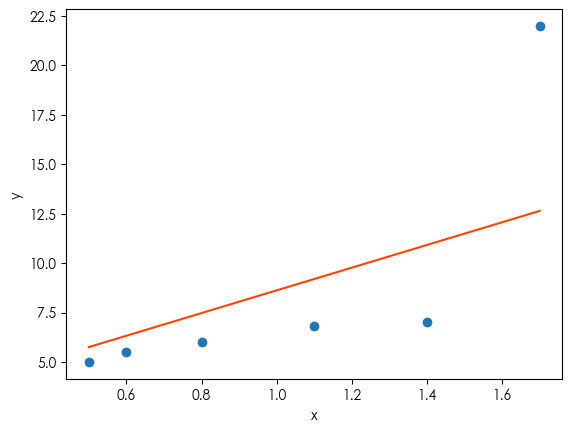

In [2]:
from sklearn.linear_model import RidgeCV

model = RidgeCV(alphas=[0.001, 0.01, 0.05, 0.1, 1.0, 10], fit_intercept=True, cv=2)
model.fit(xs, ys)
print(model.best_score_, model.coef_, model.intercept_)
y_pred = model.predict(xs)
plt.figure()
plt.scatter(xs, ys)
plt.plot(xs, y_pred, color='orangered')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[10.38345865] [-1.83984962]


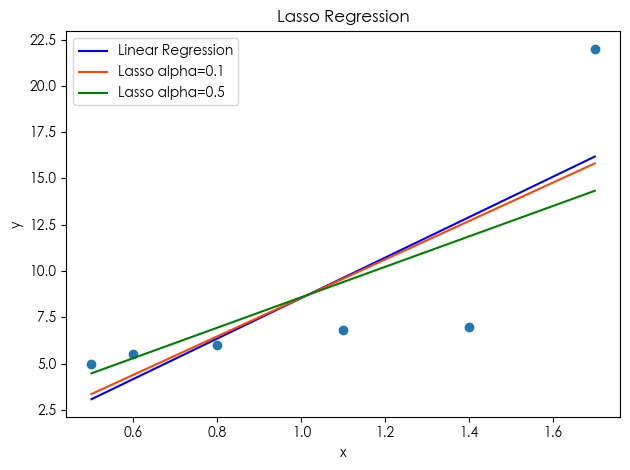

In [4]:
### 套索回归
## 当样本中存在异常值时,损失函数添加一个L2正则化项,减小模型过拟合
# Ridge 岭回归 就是L2正则化 权重平方和 * 系数
# Lasso 套索回归 就是L1正则化 权重绝对值和 * 系数

from sklearn.linear_model import Lasso, LinearRegression
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['STHeiti']
plt.rcParams['axes.unicode_minus'] = False

xs = np.array([0.5, 0.6, 0.8, 1.1, 1.4, 1.7]).reshape(-1, 1)
ys = np.array([5.0, 5.5, 6.0, 6.8, 7.0, 22]).reshape(-1, 1)

linear = LinearRegression()
linear.fit(xs, ys)
y_linear = linear.predict(xs)

## alpha正则强度
## alpha=0 退化成普通线性回归,偏差小, 但方差可能更大, 太小,过拟合
## alpha > 0, 增加偏差, 但降低方差, 总体误差可能更小, 太大,会导致欠拟合
alpha1 = 0.1
model = Lasso(alpha=alpha1, fit_intercept=True, max_iter=10000)
model.fit(xs, ys)
print(model.coef_, model.intercept_)
y_pred = model.predict(xs)

alpha2 = 0.5
model2 = Lasso(alpha=alpha2, fit_intercept=True, max_iter=10000)
model2.fit(xs, ys)
y_pred2 = model2.predict(xs)

plt.figure()
plt.scatter(xs, ys)
plt.plot(xs, y_linear, color='blue', label='Linear Regression')
plt.plot(xs, y_pred, color='orangered', label=f'Lasso alpha={alpha1}')
plt.plot(xs, y_pred2, color='green', label=f'Lasso alpha={alpha2}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Lasso Regression')
plt.tight_layout()
plt.show()